# Journal 03: Open, Close, Highs, Lows $\rightarrow$ Candlesticks

The aim of this journal is to expand on the previous data generation techniques. Since we already have a means of generating a list of data points, this should be relatively easy enough to fabricate highs, lows, opens, and closes.

The first approach is going to be basing it off the rough differences in these values from a median value using historical AAPL stock data. So this journal also serves the purpose of cracking 'data-processing' using these real datasets. When it is all properly prepared, then we can perform the appropiate analysis.

### Reading and Processing Data

In [348]:
import numpy as np
import pandas as pd

aapl = pd.read_csv('data/AAPL_historical.csv')

aapl.head()

,Date,Close/Last,Volume,Open,High,Low
0,09/27/2023,$170.43,66921810,$172.62,$173.04,$169.05
1,09/26/2023,$171.96,64588950,$174.82,$175.20,$171.66
2,09/25/2023,$176.08,46172740,$174.20,$176.97,$174.15
3,09/22/2023,$174.79,56725390,$174.67,$177.079,$174.05
4,09/21/2023,$173.93,63149120,$174.55,$176.30,$173.86


#### Initial Analysis

Here we see the dataset has our important features. The ones that we are most interested in are `Close/Last`, `Open`, `High`, and `Low`. `Volume` will be handled in the future.

These 4 columns have that '$' in front of the float value, so the first thing we need to do is get rid of that.

Let's start by copying the DataFrame, and dropping `Data` and `Volume`, so we have just the core columns that we are interested in.

In [349]:
data = aapl.copy()

data = data.drop(['Date', 'Volume'], axis=1)

data.head()

,Close/Last,Open,High,Low
0,$170.43,$172.62,$173.04,$169.05
1,$171.96,$174.82,$175.20,$171.66
2,$176.08,$174.20,$176.97,$174.15
3,$174.79,$174.67,$177.079,$174.05
4,$173.93,$174.55,$176.30,$173.86


In [350]:
type(data['Open'][0])


str

Luckily for us, this should be a quick fix.

We need to do 2 things:
1. Remove the first character of the string
2. Change the string to a float value.

We can, (also luckily) perform both steps in a single line for each column. So i'm going to create another copy of the DataFrame to illustrate the approach.

In [351]:
p_data = data.copy()

p_data['Close/Last'] = p_data['Close/Last'].str.replace('$', '').astype('float64')
p_data['Open'] = p_data['Open'].str.replace('$', '').astype('float64')
p_data['High'] = p_data['High'].str.replace('$', '').astype('float64')
p_data['Low'] = p_data['Low'].str.replace('$', '').astype('float64')

print(type(p_data['Close/Last'][0]))
p_data.head()

<class 'numpy.float64'>


,Close/Last,Open,High,Low
0,170.43,172.62,173.040,169.05
1,171.96,174.82,175.200,171.66
2,176.08,174.20,176.970,174.15
3,174.79,174.67,177.079,174.05
4,173.93,174.55,176.300,173.86


Even better than the above approach is extracting the column names, and the running through them with a for loop (efficiency and ease is a lot better than writing the 'same' line over and over again).


In [352]:
columns = data.columns
print(columns)

for column in columns:
    data[column] = data[column].str.replace('$', '').astype('float64')

data.head()

Index(['Close/Last', 'Open', 'High', 'Low'], dtype='object')


,Close/Last,Open,High,Low
0,170.43,172.62,173.040,169.05
1,171.96,174.82,175.200,171.66
2,176.08,174.20,176.970,174.15
3,174.79,174.67,177.079,174.05
4,173.93,174.55,176.300,173.86


### Analyzing Relationships

Here are the objectives/things I am looking for with this dataset (subject to change):

For each row (initially):
- Distance between:
    - Open $\rightarrow$ Close
    - High $\rightarrow$ Low

    - If it is a *'Green' day* (pun intended):
        - Open $\rightarrow$ Low
        - Close $\rightarrow$ High
    - If it is a 'Red' day:
        - Close $\rightarrow$ Low
        - Open $\rightarrow$ High
    - Average $\rightarrow$ High
    - Average $\rightarrow$ Low

- Average between Open & Close
- Average between High & Low
- Average of all columns

For whole dataset:
- Summary of statistics for all above values

Remember, this information is important for the sake of simulating this in our own *fake* datasets. At the end. All of this code will more than likely be combined into a more generalized function for the purpose of running through several real historical datasets.

> It might also be wise to adjust for inflation, or scale this information to be more accurate. Though if we are just looking for a raw distance, we probably can rock and roll with what we have without performing that processing step (though it's a good idea to explore regardless, so why not add it to the overarching to-do list?)

#### Where to Start

I think the wisest way to approach this problem is to add additional information to our dataset, starting with whether the day was a 'green' day or a 'red' day (this will also be necessary for coloring our candlesticks, supposing that we can even make them using Matplotlib).

In [353]:
color = []

for ind in data.index:
    if data['Open'][ind] < data['Close/Last'][ind]:
        color.append('g')
    else:
        color.append('r')

data['Color'] = color

data.head()

,Close/Last,Open,High,Low,Color
0,170.43,172.62,173.040,169.05,r
1,171.96,174.82,175.200,171.66,r
2,176.08,174.20,176.970,174.15,g
3,174.79,174.67,177.079,174.05,g
4,173.93,174.55,176.300,173.86,r


Now this will help when we get to determining distances between Open/Close and High/Low depending on whether the day was green or red.

Next up, determining the distance between the open and close values. 

Quickly though, I would like to see if there is an easier way to add a row without making a new list variable first.

In [354]:
data['test'] = np.zeros(len(data))

data.head()

,Close/Last,Open,High,Low,Color,test
0,170.43,172.62,173.040,169.05,r,0.0
1,171.96,174.82,175.200,171.66,r,0.0
2,176.08,174.20,176.970,174.15,g,0.0
3,174.79,174.67,177.079,174.05,g,0.0
4,173.93,174.55,176.300,173.86,r,0.0


In [355]:
data = data.drop(['test'], axis=1)

data.head()

,Close/Last,Open,High,Low,Color
0,170.43,172.62,173.040,169.05,r
1,171.96,174.82,175.200,171.66,r
2,176.08,174.20,176.970,174.15,g
3,174.79,174.67,177.079,174.05,g
4,173.93,174.55,176.300,173.86,r


This is probably the best we are going to get in the meantime. So let's just get the rest of the columns done and overwith so we can collect the data all in one `for` loop (reduced labor is better than excess labor)

List reproduced for ease:
- Distance between:
    - Open $\rightarrow$ Close
    - High $\rightarrow$ Low

    - If it is a *'Green' day* (pun intended):
        - Open $\rightarrow$ Low
        - Close $\rightarrow$ High
    - If it is a 'Red' day:
        - Close $\rightarrow$ Low
        - Open $\rightarrow$ High
    - Average $\rightarrow$ High
    - Average $\rightarrow$ Low

- Average between Open & Close
- Average between High & Low
- Average of all columns

In [356]:
# Struct:
# Average between all points
# Average between distance of open and close
# Average between high and low
# All_average to High
# All_average to Low

# Distance between open and close
# Distance between high and low

# G_dist Open to Low
# G_dist Close to High
# R_dist Open to High
# R_dist Close to Low


# Computing the average of all values, inserting as second row.
vals_data = data[['Close/Last', 'Open', 'High', 'Low']]
vals_data.head()

data['avg_all'] = vals_data.mean(axis=1)

# Dropping color for the sake of column organization. 
# This will be added at the end of the DataFrame

greens = data[data['Color'] == 'g']
reds = data[data['Color'] == 'r']


# newCols = ['avg_op_cl', 'avg_hi_lo',
#            'all_avg_to_hi', 'all_avg_to_lo', 
#            'dist_hi_lo', 'dist_op_cl', 
#            'g_dist_op_lo', 'g_dist_cl_hi',
#            'r_dist_op_hi', 'r_dist_cl_lo']


data['avg_op_cl'] = data[['Open', 'Close/Last']].mean(axis=1)
data['avg_hi_lo'] = data[['High', 'Low']].mean(axis=1)
data['all_avg_to_hi'] = data[['avg_all', 'High']].mean(axis=1)
data['all_avg_to_lo'] = data[['avg_all', 'Low']].mean(axis=1)

data['dist_op_cl'] = data['Open'] - data['Close/Last']
data['dist_hi_lo'] = data['High'] - data['Low']
data['dist_avg_all_hi'] = data['High'] - data['avg_all']
data['dist_avg_all_lo'] = data['avg_all'] - data['Low']
data['dist_avg_all_op'] = data['Open'] - data['avg_all']
data['dist_avg_all_cl'] = data['avg_all'] - data['Close/Last']

data['g_dist_op_lo'] = greens['Open'] - greens['Low']
data['g_dist_cl_hi'] = greens['High'] - greens['Close/Last']

data['r_dist_op_hi'] = reds['High'] - reds['Open']
data['r_dist_cl_lo'] = reds['Close/Last'] - reds['Low']

colors = data.pop('Color')
data['Color'] = colors


data.head()

# for col in newCols:
#     data[col] = np.zeros(len(data))

data.head()

,Close/Last,Open,High,Low,avg_all,avg_op_cl,avg_hi_lo,all_avg_to_hi,all_avg_to_lo,dist_op_cl,dist_hi_lo,dist_avg_all_hi,dist_avg_all_lo,dist_avg_all_op,dist_avg_all_cl,g_dist_op_lo,g_dist_cl_hi,r_dist_op_hi,r_dist_cl_lo,Color
0,170.43,172.62,173.040,169.05,171.28500,171.525,171.0450,172.162500,170.167500,2.19,3.990,1.75500,2.23500,1.33500,0.85500,NaN,NaN,0.42,1.38,r
1,171.96,174.82,175.200,171.66,173.41000,173.390,173.4300,174.305000,172.535000,2.86,3.540,1.79000,1.75000,1.41000,1.45000,NaN,NaN,0.38,0.30,r
2,176.08,174.20,176.970,174.15,175.35000,175.140,175.5600,176.160000,174.750000,-1.88,2.820,1.62000,1.20000,-1.15000,-0.73000,0.05,0.890,NaN,NaN,g
3,174.79,174.67,177.079,174.05,175.14725,174.730,175.5645,176.113125,174.598625,-0.12,3.029,1.93175,1.09725,-0.47725,0.35725,0.62,2.289,NaN,NaN,g
4,173.93,174.55,176.300,173.86,174.66000,174.240,175.0800,175.480000,174.260000,0.62,2.440,1.64000,0.80000,-0.11000,0.73000,NaN,NaN,1.75,0.07,r


In [357]:
data.describe()

,Close/Last,Open,High,Low,avg_all,avg_op_cl,avg_hi_lo,all_avg_to_hi,all_avg_to_lo,dist_op_cl,dist_hi_lo,dist_avg_all_hi,dist_avg_all_lo,dist_avg_all_op,dist_avg_all_cl,g_dist_op_lo,g_dist_cl_hi,r_dist_op_hi,r_dist_cl_lo
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,1338.000000,1338.000000,1178.000000,1178.000000
mean,73.648758,73.595819,74.408970,72.825885,73.619858,73.622289,73.617428,74.014414,73.222872,-0.052939,1.583085,0.789112,0.793973,-0.024039,-0.028900,0.380459,0.343238,0.417071,0.395559
std,54.214036,54.174264,54.820721,53.563875,54.189481,54.189721,54.189753,54.504439,53.875939,1.386212,1.637988,0.828909,0.842562,0.702855,0.722693,0.600888,0.502096,0.585022,0.554862
min,17.026800,17.044600,17.202100,16.943300,17.054200,17.035700,17.072700,17.128150,16.998750,-10.160000,0.115000,0.046875,0.052625,-4.962500,-5.197500,0.000000,0.000000,0.000000,0.000000
25%,28.923750,28.990000,29.195000,28.714375,28.947500,28.985625,28.943438,29.073516,28.820859,-0.402500,0.425975,0.208556,0.209844,-0.212025,-0.215156,0.062500,0.060000,0.073825,0.080000
50%,46.426250,46.335000,46.822500,46.038750,46.400000,46.402500,46.425000,46.637500,46.184844,-0.037500,0.825000,0.419063,0.420625,-0.017050,-0.016875,0.166250,0.152500,0.185000,0.191250
75%,129.132500,128.892500,130.496050,127.085000,128.935713,128.882500,128.806875,129.690000,128.196094,0.307500,2.412500,1.160000,1.165000,0.162500,0.165000,0.434375,0.410000,0.510000,0.478750
max,196.450000,196.235000,198.230000,195.280000,196.065000,196.255000,196.005000,196.500000,195.662500,7.080000,12.810000,5.465000,8.015000,4.097500,3.815000,9.180000,4.217500,5.040000,6.380000


In [358]:
data_stats = data.drop(['Open', 'Close/Last', 'High', 'Low'], axis=1)

# data_stats[:100].describe()
data_stats.describe()

,avg_all,avg_op_cl,avg_hi_lo,all_avg_to_hi,all_avg_to_lo,dist_op_cl,dist_hi_lo,dist_avg_all_hi,dist_avg_all_lo,dist_avg_all_op,dist_avg_all_cl,g_dist_op_lo,g_dist_cl_hi,r_dist_op_hi,r_dist_cl_lo
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,1338.000000,1338.000000,1178.000000,1178.000000
mean,73.619858,73.622289,73.617428,74.014414,73.222872,-0.052939,1.583085,0.789112,0.793973,-0.024039,-0.028900,0.380459,0.343238,0.417071,0.395559
std,54.189481,54.189721,54.189753,54.504439,53.875939,1.386212,1.637988,0.828909,0.842562,0.702855,0.722693,0.600888,0.502096,0.585022,0.554862
min,17.054200,17.035700,17.072700,17.128150,16.998750,-10.160000,0.115000,0.046875,0.052625,-4.962500,-5.197500,0.000000,0.000000,0.000000,0.000000
25%,28.947500,28.985625,28.943438,29.073516,28.820859,-0.402500,0.425975,0.208556,0.209844,-0.212025,-0.215156,0.062500,0.060000,0.073825,0.080000
50%,46.400000,46.402500,46.425000,46.637500,46.184844,-0.037500,0.825000,0.419063,0.420625,-0.017050,-0.016875,0.166250,0.152500,0.185000,0.191250
75%,128.935713,128.882500,128.806875,129.690000,128.196094,0.307500,2.412500,1.160000,1.165000,0.162500,0.165000,0.434375,0.410000,0.510000,0.478750
max,196.065000,196.255000,196.005000,196.500000,195.662500,7.080000,12.810000,5.465000,8.015000,4.097500,3.815000,9.180000,4.217500,5.040000,6.380000


In [359]:
data.head()

,Close/Last,Open,High,Low,avg_all,avg_op_cl,avg_hi_lo,all_avg_to_hi,all_avg_to_lo,dist_op_cl,dist_hi_lo,dist_avg_all_hi,dist_avg_all_lo,dist_avg_all_op,dist_avg_all_cl,g_dist_op_lo,g_dist_cl_hi,r_dist_op_hi,r_dist_cl_lo,Color
0,170.43,172.62,173.040,169.05,171.28500,171.525,171.0450,172.162500,170.167500,2.19,3.990,1.75500,2.23500,1.33500,0.85500,NaN,NaN,0.42,1.38,r
1,171.96,174.82,175.200,171.66,173.41000,173.390,173.4300,174.305000,172.535000,2.86,3.540,1.79000,1.75000,1.41000,1.45000,NaN,NaN,0.38,0.30,r
2,176.08,174.20,176.970,174.15,175.35000,175.140,175.5600,176.160000,174.750000,-1.88,2.820,1.62000,1.20000,-1.15000,-0.73000,0.05,0.890,NaN,NaN,g
3,174.79,174.67,177.079,174.05,175.14725,174.730,175.5645,176.113125,174.598625,-0.12,3.029,1.93175,1.09725,-0.47725,0.35725,0.62,2.289,NaN,NaN,g
4,173.93,174.55,176.300,173.86,174.66000,174.240,175.0800,175.480000,174.260000,0.62,2.440,1.64000,0.80000,-0.11000,0.73000,NaN,NaN,1.75,0.07,r


<Axes: >

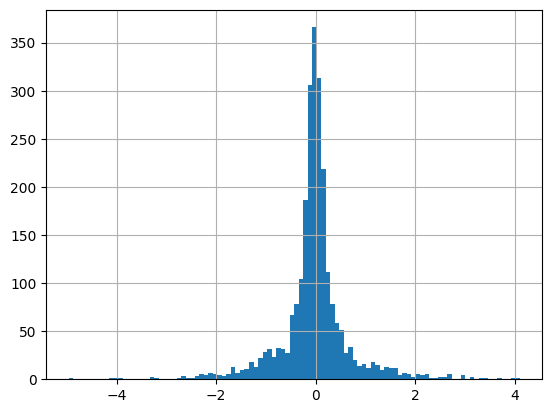

In [372]:
data['dist_avg_all_op'].hist(bins=100)

<Axes: >

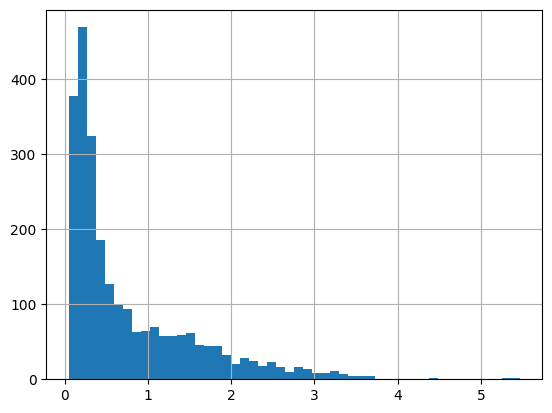

In [373]:
data['dist_avg_all_hi'].hist(bins=50)


<Axes: >

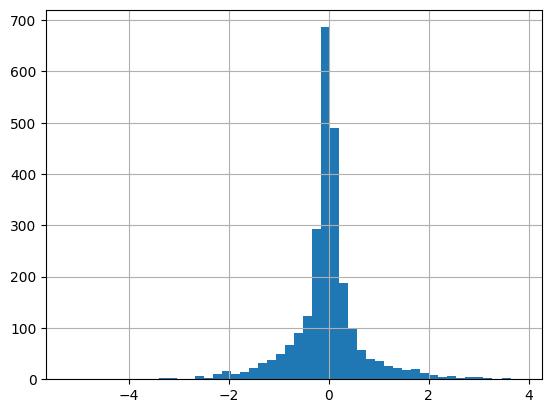

In [374]:
data['dist_avg_all_cl'].hist(bins=50)

<Axes: >

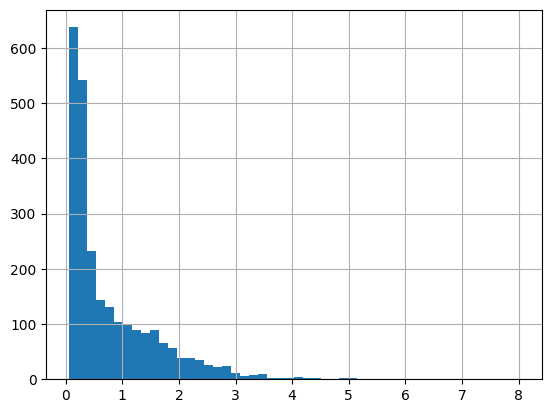

In [375]:
data['dist_avg_all_lo'].hist(bins=50)

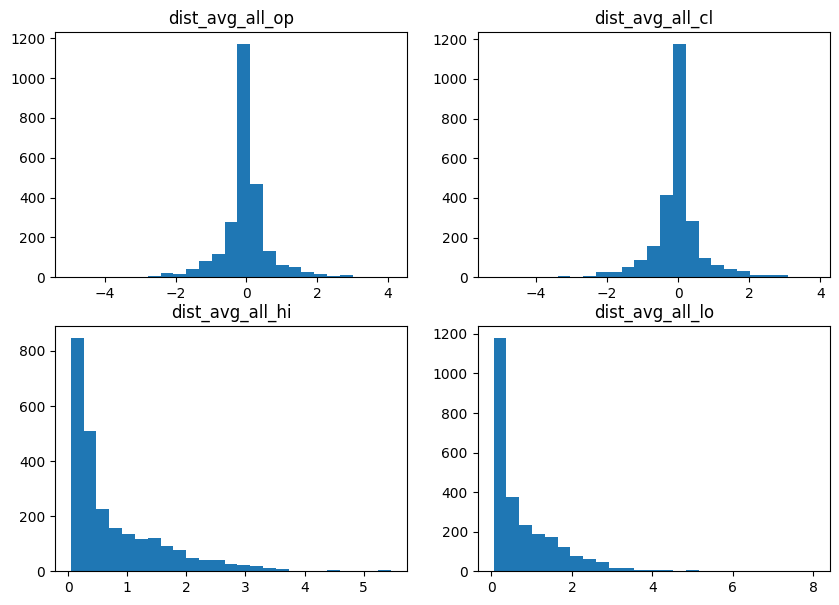

In [390]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.hist(data['dist_avg_all_op'], bins=25)
plt.title('dist_avg_all_op')

plt.subplot(2, 2, 2)
plt.hist(data['dist_avg_all_cl'], bins=25)
plt.title('dist_avg_all_cl')

plt.subplot(2, 2, 3)
plt.hist(data['dist_avg_all_hi'], bins=25)
plt.title('dist_avg_all_hi')

plt.subplot(2, 2, 4)
plt.hist(data['dist_avg_all_lo'], bins=25)
plt.title('dist_avg_all_lo')

plt.show()